# How have the Retention Rates of NCAA Member Schools changed between 2004 and 2019?

# Preparing the Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [ ]:
from google.colab import files
files=files.upload()

Saving cleaned_data2.csv to cleaned_data2.csv


In [ ]:
data=pd.read_csv("/content/cleaned_data2.csv")

In [ ]:
data.columns

Index(['SCL_UNITID', 'SCL_NAME', 'SPORT_CODE', 'SPORT_NAME', 'ACADEMIC_YEAR',
       'SCL_DIV_19', 'SCL_SUB_19', 'CONFNAME_19', 'SCL_HBCU', 'SCL_PRIVATE',
       'MULTIYR_APR_RATE_1000_RAW', 'MULTIYR_APR_RATE_1000_CI',
       'MULTIYR_APR_RATE_1000_OFFICIAL', 'RAW_OR_CI', 'MULTIYR_SQUAD_SIZE',
       'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE', 'APR_RATE_2019_1000',
       'ELIG_RATE_2019', 'RET_RATE_2019', 'NUM_OF_ATHLETES_2019',
       'APR_RATE_2018_1000', 'ELIG_RATE_2018', 'RET_RATE_2018',
       'NUM_OF_ATHLETES_2018', 'APR_RATE_2017_1000', 'ELIG_RATE_2017',
       'RET_RATE_2017', 'NUM_OF_ATHLETES_2017', 'APR_RATE_2016_1000',
       'ELIG_RATE_2016', 'RET_RATE_2016', 'NUM_OF_ATHLETES_2016',
       'APR_RATE_2015_1000', 'ELIG_RATE_2015', 'RET_RATE_2015',
       'NUM_OF_ATHLETES_2015', 'APR_RATE_2014_1000', 'ELIG_RATE_2014',
       'RET_RATE_2014', 'NUM_OF_ATHLETES_2014', 'APR_RATE_2013_1000',
       'ELIG_RATE_2013', 'RET_RATE_2013', 'NUM_OF_ATHLETES_2013',
       'APR_RATE_2012_1000'

In [ ]:
#This removes unnecessary columns
data_ret=data.drop(columns=[ 'MULTIYR_APR_RATE_1000_RAW', 'MULTIYR_APR_RATE_1000_CI',
       'MULTIYR_APR_RATE_1000_OFFICIAL', 'RAW_OR_CI', 'MULTIYR_SQUAD_SIZE',
       'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE', 'APR_RATE_2019_1000',
       'ELIG_RATE_2019', 'NUM_OF_ATHLETES_2019',
       'APR_RATE_2018_1000', 'ELIG_RATE_2018',
       'NUM_OF_ATHLETES_2018', 'APR_RATE_2017_1000', 'ELIG_RATE_2017', 'NUM_OF_ATHLETES_2017', 'APR_RATE_2016_1000',
       'ELIG_RATE_2016', 'NUM_OF_ATHLETES_2016',
       'APR_RATE_2015_1000', 'ELIG_RATE_2015',
       'NUM_OF_ATHLETES_2015', 'APR_RATE_2014_1000', 'ELIG_RATE_2014',
        'NUM_OF_ATHLETES_2014', 'APR_RATE_2013_1000',
       'ELIG_RATE_2013', 'NUM_OF_ATHLETES_2013',
       'APR_RATE_2012_1000', 'ELIG_RATE_2012',
       'NUM_OF_ATHLETES_2012', 'APR_RATE_2011_1000', 'ELIG_RATE_2011',
       'NUM_OF_ATHLETES_2011', 'APR_RATE_2010_1000',
         'NUM_OF_ATHLETES_2010','ELIG_RATE_2010',
       'APR_RATE_2009_1000', 'ELIG_RATE_2009',
       'NUM_OF_ATHLETES_2009', 'APR_RATE_2008_1000', 'ELIG_RATE_2008',
       'NUM_OF_ATHLETES_2008', 'APR_RATE_2007_1000',
       'ELIG_RATE_2007', 'NUM_OF_ATHLETES_2007',
       'APR_RATE_2006_1000', 'ELIG_RATE_2006',
       'NUM_OF_ATHLETES_2006', 'APR_RATE_2005_1000', 'ELIG_RATE_2005',
       'NUM_OF_ATHLETES_2005', 'APR_RATE_2004_1000',
       'ELIG_RATE_2004',  'NUM_OF_ATHLETES_2004',
       'PUB_AWARD_20', 'PUB_AWARD_19', 'PUB_AWARD_18', 'PUB_AWARD_17',
       'PUB_AWARD_16', 'PUB_AWARD_15', 'PUB_AWARD_14', 'PUB_AWARD_13',
       'PUB_AWARD_12', 'PUB_AWARD_11', 'PUB_AWARD_10', 'PUB_AWARD_09',
       'PUB_AWARD_08', 'PUB_AWARD_07', 'PUB_AWARD_06','SCL_UNITID', 'SCL_NAME', 'SPORT_CODE', 'SPORT_NAME', 'ACADEMIC_YEAR',
       'SCL_DIV_19', 'SCL_SUB_19', 'CONFNAME_19', 'SCL_HBCU', 'SCL_PRIVATE'])

In [ ]:
data_ret.columns

Index(['RET_RATE_2019', 'RET_RATE_2018', 'RET_RATE_2017', 'RET_RATE_2016',
       'RET_RATE_2015', 'RET_RATE_2014', 'RET_RATE_2013', 'RET_RATE_2012',
       'RET_RATE_2011', 'RET_RATE_2010', 'RET_RATE_2009', 'RET_RATE_2008',
       'RET_RATE_2007', 'RET_RATE_2006', 'RET_RATE_2005', 'RET_RATE_2004'],
      dtype='object')

# Retention Rate analysis

In [ ]:
data_ret[['RET_RATE_2019', 'RET_RATE_2018', 'RET_RATE_2017', 'RET_RATE_2016',
       'RET_RATE_2015', 'RET_RATE_2014', 'RET_RATE_2013', 'RET_RATE_2012',
       'RET_RATE_2011', 'RET_RATE_2010', 'RET_RATE_2009', 'RET_RATE_2008',
       'RET_RATE_2007', 'RET_RATE_2006', 'RET_RATE_2005', 'RET_RATE_2004']].apply({"RET_RATE_2019":["mean","median","min","max"],
                                        "RET_RATE_2018":["mean","median","min","max"],
                                        "RET_RATE_2017":["mean","median","min","max"],

                                        "RET_RATE_2016":["mean","median","min","max"],
                                        "RET_RATE_2015":["mean","median","min","max"],
                                        "RET_RATE_2014":["mean","median","min","max"],
                                        "RET_RATE_2013":["mean","median","min","max"],
                                        "RET_RATE_2012":["mean","median","min","max"],
                                        "RET_RATE_2011":["mean","median","min","max"],
                                        "RET_RATE_2010":["mean","median","min","max"],
                                        "RET_RATE_2009":["mean","median","min","max"],
                                        "RET_RATE_2008":["mean","median","min","max"],
                                         "RET_RATE_2007":["mean","median","min","max"],
                                         "RET_RATE_2006":["mean","median","min","max"],
                                         "RET_RATE_2005":["mean","median","min","max"],
                                         "RET_RATE_2004":["mean","median","min","max"]})

,RET_RATE_2019,RET_RATE_2018,RET_RATE_2017,RET_RATE_2016,RET_RATE_2015,RET_RATE_2014,RET_RATE_2013,RET_RATE_2012,RET_RATE_2011,RET_RATE_2010,RET_RATE_2009,RET_RATE_2008,RET_RATE_2007,RET_RATE_2006,RET_RATE_2005,RET_RATE_2004
mean,0.977916,0.977561,0.977910,0.977246,0.975696,0.975297,0.973303,0.970338,0.969084,0.967932,0.967932,0.965953,0.955539,0.953580,0.952880,0.952737
median,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.983471,0.980769,0.980392,0.980066,0.977778,0.965517,0.962963,0.962963,0.962963
min,0.571429,0.555556,0.727273,0.444444,0.666667,0.636364,0.714286,0.666667,0.680000,0.666667,0.555556,0.684211,0.571429,0.631579,0.571429,0.611111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_ret.mean()

,0
RET_RATE_2019,0.977916
RET_RATE_2018,0.977561
RET_RATE_2017,0.977910
RET_RATE_2016,0.977246
RET_RATE_2015,0.975696
RET_RATE_2014,0.975297
RET_RATE_2013,0.973303
RET_RATE_2012,0.970338
RET_RATE_2011,0.969084
RET_RATE_2010,0.967932


**From examining the means of yearly retention rates, spanning 2004 to 2019, we are able to see a trend of retention rates improving year over year. This indicates that as a whole, NCAA member schools are improving their rentention, and therefore improving as schools. While this change is small, it still implies that the quality of education in member schools is increasing, causing more students to stay.**

# Visual Representation

In [ ]:
#This stores the means for each year's retention rates, associated with the correct year for the purposes of data visualization
meanslist = {'year': [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], 're_mean': [0.952737,0.952880,0.953580,0.955539,0.965953,0.967932,0.967932,0.969084,0.970338,0.973303,0.975297,0.975696,0.977246,0.977910,0.977561,0.977916]}
meansframe = pd.DataFrame(meanslist)

In [ ]:
meansframe.head(1)

,year,re_mean
0,2004,0.952737


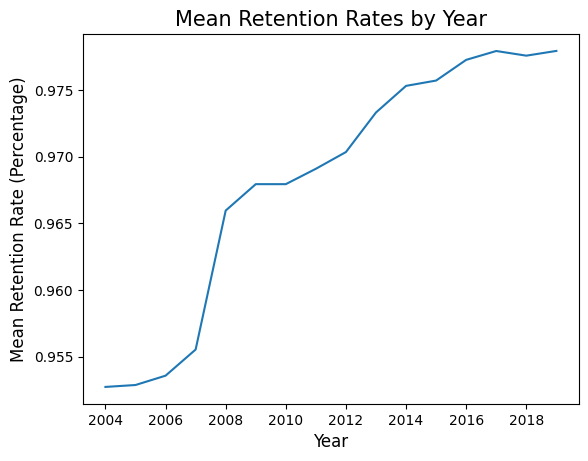

In [ ]:
sns.lineplot(meansframe, x='year', y='re_mean')
plt.title("Mean Retention Rates by Year", fontsize=15)
plt.ylabel("Mean Retention Rate (Percentage)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.show()

**From this graph it can be confirmed that retention rates appear to be increasing year over year in NCAA member schools.**

# Conclusion

**From the retention rates alone, it would appear that the quality of NCAA member schools is increasing. Retention rate means have increased year over year, with no recorded drops between 2004 and 2019. A higher mean retention rate indcates that overall, more students are staying at their schools**